In [2]:
from src.directstiffnessmethod import direct_stiffness_method as dsm
from src.directstiffnessmethod import elastic_critical_load_solver as ecls
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Set matplotlib display settings
%matplotlib inline
plt.rcParams["figure.figsize"] = (10, 10)

## Problem 1

In [3]:
nodes = {
    0: np.array([0, 0, 0]),
    1: np.array([25/6, 50/6, 37/6]),
    2: 2*np.array([25/6, 50/6, 37/6]),
    3: 3*np.array([25/6, 50/6, 37/6]),
    4: 4*np.array([25/6, 50/6, 37/6]),
    5: 5*np.array([25/6, 50/6, 37/6]),
    6: 6*np.array([25/6, 50/6, 37/6])
}

In [6]:
r = 1
section_props_element_1 = {
    "E": 10000, "nu": 0.3, "A": np.pi*r**2, "Iz": np.pi*r**4/4, "Iy": np.pi*r**4/4, "J": np.pi*r**4/2, "local_z": np.array([0.0, 0.0, 1.0])
}

In [ ]:
elements = [
    (0, 1, section_props_element_1),
    (1, 2, section_props_element_1),
    (2, 3, section_props_element_1),
    (3, 4, section_props_element_1),
    (4, 5, section_props_element_1),
    (5, 6, section_props_element_1)
]

In [8]:
loads = {
    6: np.array([0.05, -0.1, 0.23, 0.1, -0.025, -0.08])
}

In [9]:
supports = {
    0: [True, True, True, True, True, True]
}

In [10]:
solver = dsm.Frame3DSolver(nodes, elements, loads, supports)
displacements, reactions = solver.solve()

disp_matrix = displacements.reshape((-1, 6))
reac_matrix = reactions.reshape((-1, 6))
# Create a dictionary for displacements and reactions
disp_dict = {node: disp_matrix[i] for i, node in enumerate(nodes)}
react_dict = {node: reac_matrix[i] for i, node in enumerate(nodes)}
    
# Output the results
print("Nodal Displacements and Rotations:")
for node, disp in disp_dict.items():
  print(f"Node {node}: [u: {disp[0]:.10f}, v: {disp[1]:.10f}, w: {disp[2]:.10f}, "
        f"rot_x: {disp[3]:.10f}, rot_y: {disp[4]:.10f}, rot_z: {disp[5]:.10f}]")
    
print("\nReaction Forces and Moments at Supports:")
for node, react in react_dict.items():
  # Only display reactions for nodes with boundary conditions
  print(f"Node {node}: [Fx: {react[0]:.10f}, Fy: {react[1]:.10f}, Fz: {react[2]:.10f}, "
        f"Mx: {react[3]:.10f}, My: {react[4]:.10f}, Mz: {react[5]:.10f}]")

Nodal Displacements and Rotations:
Node 0: [u: 0.0000000000, v: 0.0000000000, w: 0.0000000000, rot_x: 0.0000000000, rot_y: 0.0000000000, rot_z: 0.0000000000]
Node 1: [u: 0.0122083337, v: -0.0776195542, w: 0.0966881684, rot_x: 0.0199594200, rot_y: -0.0051293922, rot_z: -0.0066399534]
Node 2: [u: 0.0460299400, v: -0.2924070239, w: 0.3641348223, rot_x: 0.0363149814, rot_y: -0.0093341102, rot_z: -0.0120944269]
Node 3: [u: 0.0972879781, v: -0.6171991153, w: 0.7684549975, rot_x: 0.0490666842, rot_y: -0.0126141539, rot_z: -0.0163634207]
Node 4: [u: 0.1618056078, v: -1.0248325348, w: 1.2757637298, rot_x: 0.0582145285, rot_y: -0.0149695234, rot_z: -0.0194469347]
Node 5: [u: 0.2354059885, v: -1.4881439886, w: 1.8521760551, rot_x: 0.0637585142, rot_y: -0.0164002187, rot_z: -0.0213449689]
Node 6: [u: 0.3139122798, v: -1.9799701830, w: 2.4638070094, rot_x: 0.0656986413, rot_y: -0.0169062397, rot_z: -0.0220575233]

Reaction Forces and Moments at Supports:
Node 0: [Fx: -0.0500000000, Fy: 0.1000000000

## Problem 2

In [13]:
r_2 = 1
section_props_element_2 = {
    "E": 10000, "nu": 0.3, "A": np.pi*r_2**2, "Iz": np.pi*r_2**4/4, "Iy": np.pi*r_2**4/4, "J": np.pi*r_2**4/2, "I_rho": np.pi*r_2**4/2
}

In [14]:
elements_ecls_2 = [
    (0, 1, section_props_element_2),
    (1, 2, section_props_element_2),
    (2, 3, section_props_element_2),
    (3, 4, section_props_element_2),
    (4, 5, section_props_element_2),
    (5, 6, section_props_element_2)
]

In [20]:
x_0 = 0
x_1 = 25
y_0 = 0
y_1 = 50
z_0 = 0
z_1 = 37
P = 1
L = np.sqrt((x_1 - x_0)**2 + (y_1 - y_0)**2 + (z_1 - z_0)**2)
Fx = -1.0*P*(x_1 - x_0)/L
Fy = -1.0*P*(y_1 - y_0)/L
Fz = -1.0*P*(z_1 - z_0)/L
loads_ecls = {
    6: np.array([Fx, Fy, Fz, 0, 0, 0])
}

In [22]:
frame_solver_ecla = dsm.Frame3DSolver(nodes, elements_ecls_2, loads_ecls, supports)

In [23]:
for use_interaction in [True, False]:
    solver_type = "Without Interaction Terms" if not use_interaction else "With Interaction Terms"
    print(f"Solving for {solver_type}")

    ecl_solver = ecls.ElasticCriticalLoadSolver(frame_solver_ecla, use_interaction_terms=use_interaction)
    eigenvalues, eigenvectors = ecl_solver.solve_eigenvalue_problem()

    mode_shape = eigenvectors[:, 0]

    # Plot the first buckling mode using Hermite shape functions
    print("Critical Load Factors:", eigenvalues)
    print(f"Lowest Critical Load Factor: {np.min(eigenvalues)}")

Solving for With Interaction Terms
Critical Load Factors: [4.31220492e+00 4.31220492e+00 3.88294679e+01 3.88294679e+01
 1.08208853e+02 1.08208853e+02 2.14130782e+02 2.14130782e+02
 3.60918758e+02 3.60918758e+02 5.52807919e+02 5.52807919e+02
 8.51879475e+02 8.51879475e+02 1.21212109e+03 1.21212109e+03
 1.71377509e+03 1.71377509e+03 2.37385192e+03 2.37385192e+03
 3.12531587e+03 3.12531587e+03 3.69053243e+03 3.69053243e+03
 1.20830487e+04 1.20830487e+04 1.20830487e+04 1.20830487e+04
 1.20830487e+04 1.20830487e+04 3.14159265e+04 3.14159265e+04
 3.14159265e+04 3.14159265e+04 3.14159265e+04 3.14159265e+04]
Lowest Critical Load Factor: 4.3122049198397105
Solving for Without Interaction Terms
Critical Load Factors: [4.31220492e+00 4.31220492e+00 3.88294679e+01 3.88294679e+01
 1.08208853e+02 1.08208853e+02 2.14130782e+02 2.14130782e+02
 3.60918758e+02 3.60918758e+02 5.52807919e+02 5.52807919e+02
 8.51879475e+02 8.51879475e+02 1.21212109e+03 1.21212109e+03
 1.71377509e+03 1.71377509e+03 2.373851

## Problem 3

In [28]:
L1 = 11.0
L2 = 23.0
L3 = 15.0
L4 = 13.0
x0 = 0.0
y0 = 0.0
z0 = 0.0
E_a = 10000
nu_a = 0.3
r_3 = 1
A_a = np.pi*r_3**2
I_y_a = np.pi*r_3**4/4
I_z_a = np.pi*r_3**4/4
I_rho_a = np.pi*r_3**4/2
J_a = np.pi*r_3**4/2
E_b = 50000
nu_b = 0.3
b = 0.5
h = 1
A_b = b*h
I_y_b = h*b**3/12
I_z_b = b*h**3/12
I_rho_b = b*h*(b**2 + h**2)/12
J_b = 0.028610026041666667
F_z_3 = -1

nodes_ecls_3 = {
    0: np.array([x0, y0, z0]),
    1: np.array([x0 + L1, y0, z0]),
    2: np.array([x0 + L1, y0 + L2, z0]),
    3: np.array([x0, y0 + L2, z0]),
    4: np.array([x0, y0, z0 + L3]),
    5: np.array([x0 + L1, y0, z0 + L3]),
    6: np.array([x0 + L1, y0 + L2, z0 + L3]),
    7: np.array([x0, y0 + L2, z0 + L3]),
    8: np.array([x0, y0, z0 + L3 + L4]),
    9: np.array([x0 + L1, y0, z0 + L3 + L4]),
    10: np.array([x0 + L1, y0 + L2, z0 + L3 + L4]),
    11: np.array([x0, y0 + L2, z0 + L3 + L4])
}

elements_ecls_3 = [
    (0, 4, {"E": E_a , "nu": nu_a, "A": A_a, "Iz": I_z_a, "Iy": I_y_a, "J": J_a, "I_rho": I_rho_a}),
    (1, 5, {"E": E_a , "nu": nu_a, "A": A_a, "Iz": I_z_a, "Iy": I_y_a, "J": J_a, "I_rho": I_rho_a}),
    (2, 6, {"E": E_a , "nu": nu_a, "A": A_a, "Iz": I_z_a, "Iy": I_y_a, "J": J_a, "I_rho": I_rho_a}),
    (3, 7, {"E": E_a , "nu": nu_a, "A": A_a, "Iz": I_z_a, "Iy": I_y_a, "J": J_a, "I_rho": I_rho_a}),
    (4, 8, {"E": E_a , "nu": nu_a, "A": A_a, "Iz": I_z_a, "Iy": I_y_a, "J": J_a, "I_rho": I_rho_a}),
    (5, 9, {"E": E_a , "nu": nu_a, "A": A_a, "Iz": I_z_a, "Iy": I_y_a, "J": J_a, "I_rho": I_rho_a}),
    (6, 10, {"E": E_a , "nu": nu_a, "A": A_a, "Iz": I_z_a, "Iy": I_y_a, "J": J_a, "I_rho": I_rho_a}),
    (7, 11, {"E": E_a , "nu": nu_a, "A": A_a, "Iz": I_z_a, "Iy": I_y_a, "J": J_a, "I_rho": I_rho_a}),
    (4, 5, {"E": E_b , "nu": nu_b, "A": A_b, "Iz": I_z_b, "Iy": I_y_b, "J": J_b, "I_rho": I_rho_b}),
    (5, 6, {"E": E_b , "nu": nu_b, "A": A_b, "Iz": I_z_b, "Iy": I_y_b, "J": J_b, "I_rho": I_rho_b}),
    (6, 7, {"E": E_b , "nu": nu_b, "A": A_b, "Iz": I_z_b, "Iy": I_y_b, "J": J_b, "I_rho": I_rho_b}),
    (7, 4, {"E": E_b , "nu": nu_b, "A": A_b, "Iz": I_z_b, "Iy": I_y_b, "J": J_b, "I_rho": I_rho_b}),
    (8, 9, {"E": E_b , "nu": nu_b, "A": A_b, "Iz": I_z_b, "Iy": I_y_b, "J": J_b, "I_rho": I_rho_b}),
    (9, 10, {"E": E_b , "nu": nu_b, "A": A_b, "Iz": I_z_b, "Iy": I_y_b, "J": J_b, "I_rho": I_rho_b}),
    (10, 11, {"E": E_b , "nu": nu_b, "A": A_b, "Iz": I_z_b, "Iy": I_y_b, "J": J_b, "I_rho": I_rho_b}),
    (11, 8, {"E": E_b , "nu": nu_b, "A": A_b, "Iz": I_z_b, "Iy": I_y_b, "J": J_b, "I_rho": I_rho_b})    
]

In [29]:
loads_ecls_3 = {
    8: np.array([0, 0, F_z_3, 0, 0, 0]),
    9: np.array([0, 0, F_z_3, 0, 0, 0]),
    10: np.array([0, 0, F_z_3, 0, 0, 0]),
    11: np.array([0, 0, F_z_3, 0, 0, 0])
}

In [30]:
supports_ecls_3 = {
    0: [True, True, True, True, True, True],
    1: [True, True, True, True, True, True],
    2: [True, True, True, True, True, True],
    3: [True, True, True, True, True, True]
}

Solving for With Interaction Terms
Critical Load Factors: [3.92187372e+01 5.34850726e+01 8.19292711e+01 2.40090337e+02
 2.51865718e+02 2.62922338e+02 2.86744051e+02 6.07836685e+02
 7.12800160e+02 7.30908336e+02 7.46898307e+02 7.47116351e+02
 8.13243328e+02 8.53204236e+02 8.64229917e+02 9.24434413e+02
 2.16657100e+03 2.19552928e+03 2.22036005e+03 2.22111499e+03
 2.23789251e+03 2.28912319e+03 2.31054616e+03 2.33501041e+03
 1.01337411e+04 1.01782034e+04 1.78529890e+04 2.08095404e+04
 2.09240066e+04 2.17211975e+04 2.57884415e+04 2.94655966e+04
 3.14159265e+04 3.14159265e+04 3.14212271e+04 3.14549236e+04
 3.14644536e+04 3.14697543e+04 3.17735226e+04 3.18125189e+04
 5.44685761e+04 7.38368339e+04 7.54778906e+04 8.18174591e+04
 1.14761470e+05 1.40088947e+05 1.57683681e+05 1.57905284e+05]
Lowest Critical Load Factor: 39.2187371620532


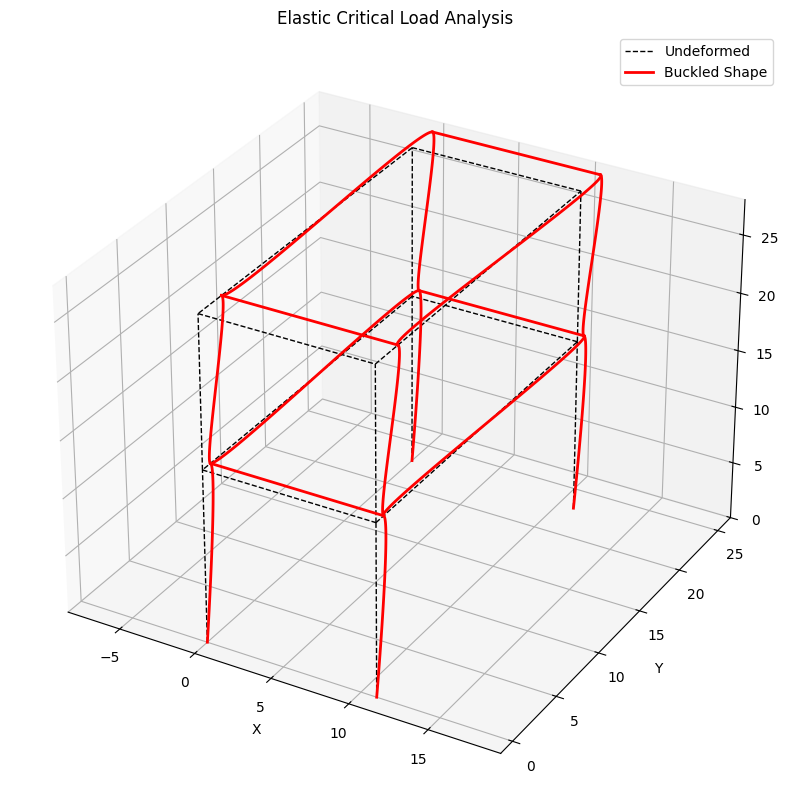

Solving for Without Interaction Terms
Critical Load Factors: [3.92187372e+01 5.34850726e+01 8.19292711e+01 2.40090337e+02
 2.51865718e+02 2.62922338e+02 2.86744051e+02 6.07836685e+02
 7.12800160e+02 7.30908336e+02 7.46898307e+02 7.47116351e+02
 8.13243328e+02 8.53204236e+02 8.64229917e+02 9.24434413e+02
 2.16657100e+03 2.19552928e+03 2.22036005e+03 2.22111499e+03
 2.23789251e+03 2.28912319e+03 2.31054616e+03 2.33501041e+03
 1.01337411e+04 1.01782034e+04 1.78529890e+04 2.08095404e+04
 2.09240066e+04 2.17211975e+04 2.57884415e+04 2.94655966e+04
 3.14159265e+04 3.14159265e+04 3.14212271e+04 3.14549236e+04
 3.14644536e+04 3.14697543e+04 3.17735226e+04 3.18125189e+04
 5.44685761e+04 7.38368339e+04 7.54778906e+04 8.18174591e+04
 1.14761470e+05 1.40088947e+05 1.57683681e+05 1.57905284e+05]
Lowest Critical Load Factor: 39.21873716203157


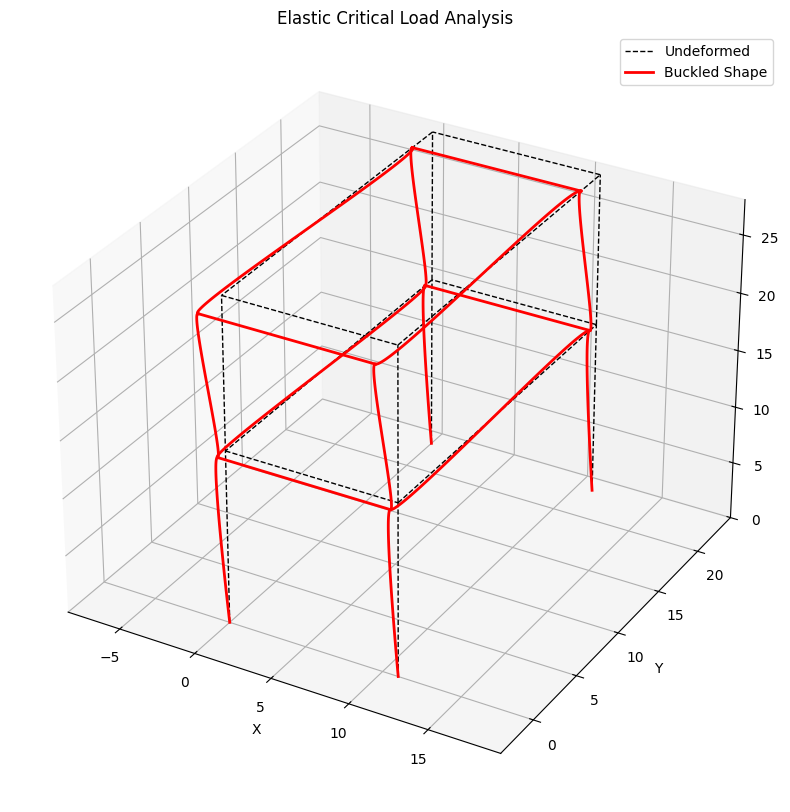

In [31]:
frame_solver_ecla = dsm.Frame3DSolver(nodes_ecls_3, elements_ecls_3, loads_ecls_3, supports_ecls_3)

# Solve for buckling modes WITH and WITHOUT the interaction terms
for use_interaction in [True, False]:
    solver_type = "Without Interaction Terms" if not use_interaction else "With Interaction Terms"
    print(f"Solving for {solver_type}")

    ecl_solver = ecls.ElasticCriticalLoadSolver(frame_solver_ecla, use_interaction_terms=use_interaction)
    eigenvalues, eigenvectors = ecl_solver.solve_eigenvalue_problem()

    mode_shape = eigenvectors[:, 0]

    # Plot the first buckling mode using Hermite shape functions
    print("Critical Load Factors:", eigenvalues)
    print(f"Lowest Critical Load Factor: {np.min(eigenvalues)}")
    ecls.plot_buckling_mode(ecl_solver.frame_solver, mode_shape, scale_factor=5)